# Régression linéaire 

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from pandas import read_csv

,population_ville,benefice
0,6.1101,17.59200
1,5.5277,9.13020
2,8.5186,13.66200
3,7.0032,11.85400
4,5.8598,6.82330
...,...,...
92,5.8707,7.20290
93,5.3054,1.98690
94,8.2934,0.14454
95,13.3940,9.05510


# Importer les données 

In [25]:
df = read_csv('ex1data1.txt',names=["population_ville","benefice"])
df

,population_ville,benefice
0,6.1101,17.59200
1,5.5277,9.13020
2,8.5186,13.66200
3,7.0032,11.85400
4,5.8598,6.82330
...,...,...
92,5.8707,7.20290
93,5.3054,1.98690
94,8.2934,0.14454
95,13.3940,9.05510


In [3]:
#X = df.loc[:, 'population_ville']
#Y = df.loc[:, 'benefice']
x , y = np.loadtxt('ex1data1.txt' , delimiter =',' , unpack = True)

Text(0, 0.5, 'benefice')

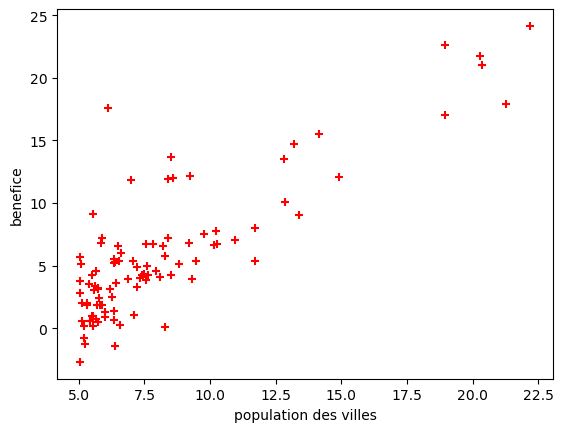

In [4]:
plt.scatter(x,y,marker='+',c='r')
plt.xlabel('population des villes')
plt.ylabel('benefice')

In [5]:
x

array([ 6.1101,  5.5277,  8.5186,  7.0032,  5.8598,  8.3829,  7.4764,
        8.5781,  6.4862,  5.0546,  5.7107, 14.164 ,  5.734 ,  8.4084,
        5.6407,  5.3794,  6.3654,  5.1301,  6.4296,  7.0708,  6.1891,
       20.27  ,  5.4901,  6.3261,  5.5649, 18.945 , 12.828 , 10.957 ,
       13.176 , 22.203 ,  5.2524,  6.5894,  9.2482,  5.8918,  8.2111,
        7.9334,  8.0959,  5.6063, 12.836 ,  6.3534,  5.4069,  6.8825,
       11.708 ,  5.7737,  7.8247,  7.0931,  5.0702,  5.8014, 11.7   ,
        5.5416,  7.5402,  5.3077,  7.4239,  7.6031,  6.3328,  6.3589,
        6.2742,  5.6397,  9.3102,  9.4536,  8.8254,  5.1793, 21.279 ,
       14.908 , 18.959 ,  7.2182,  8.2951, 10.236 ,  5.4994, 20.341 ,
       10.136 ,  7.3345,  6.0062,  7.2259,  5.0269,  6.5479,  7.5386,
        5.0365, 10.274 ,  5.1077,  5.7292,  5.1884,  6.3557,  9.7687,
        6.5159,  8.5172,  9.1802,  6.002 ,  5.5204,  5.0594,  5.7077,
        7.6366,  5.8707,  5.3054,  8.2934, 13.394 ,  5.4369])

In [6]:
y

array([17.592  ,  9.1302 , 13.662  , 11.854  ,  6.8233 , 11.886  ,
        4.3483 , 12.     ,  6.5987 ,  3.8166 ,  3.2522 , 15.505  ,
        3.1551 ,  7.2258 ,  0.71618,  3.5129 ,  5.3048 ,  0.56077,
        3.6518 ,  5.3893 ,  3.1386 , 21.767  ,  4.263  ,  5.1875 ,
        3.0825 , 22.638  , 13.501  ,  7.0467 , 14.692  , 24.147  ,
       -1.22   ,  5.9966 , 12.134  ,  1.8495 ,  6.5426 ,  4.5623 ,
        4.1164 ,  3.3928 , 10.117  ,  5.4974 ,  0.55657,  3.9115 ,
        5.3854 ,  2.4406 ,  6.7318 ,  1.0463 ,  5.1337 ,  1.844  ,
        8.0043 ,  1.0179 ,  6.7504 ,  1.8396 ,  4.2885 ,  4.9981 ,
        1.4233 , -1.4211 ,  2.4756 ,  4.6042 ,  3.9624 ,  5.4141 ,
        5.1694 , -0.74279, 17.929  , 12.054  , 17.054  ,  4.8852 ,
        5.7442 ,  7.7754 ,  1.0173 , 20.992  ,  6.6799 ,  4.0259 ,
        1.2784 ,  3.3411 , -2.6807 ,  0.29678,  3.8845 ,  5.7014 ,
        6.7526 ,  2.0576 ,  0.47953,  0.20421,  0.67861,  7.5435 ,
        5.3436 ,  4.2415 ,  6.7981 ,  0.92695,  0.152  ,  2.82

In [7]:
x = x.reshape(x.shape[0], 1)
y = y.reshape(x.shape[0], 1)

In [8]:
x.shape

(97, 1)

In [9]:
y.shape

(97, 1)

In [10]:
X = np.hstack((x , np.ones(x.shape)))
X.shape

(97, 2)

In [11]:
theta = np.array([[0],[0]])
theta.shape

(2, 1)

# Modele

In [12]:
def model(X , theta):
    return X.dot(theta)

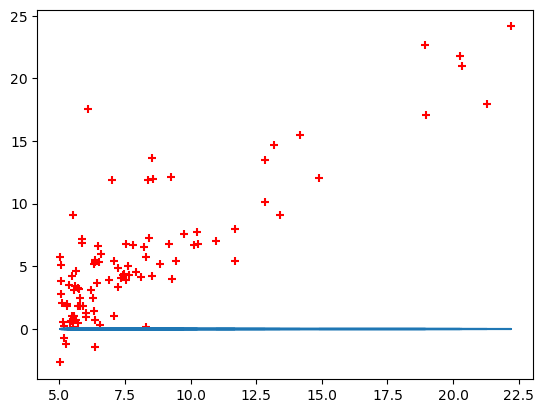

In [13]:
plt.scatter(x , y , c='r',marker='+')
plt.plot(x , model(X,theta))

# Fonction cout

In [14]:
def fonction_cout(X ,y , theta ):
    m = len(y)
    return (1/(2*m)) * np.sum((model(X ,theta) - y)**2)

In [15]:
fonction_cout(X , y , theta)

32.072733877455676

# Gradients et Descente de Gradient


In [16]:
def grad(X , y , theta):
    m = len(y)
    return (1/m) * X.T.dot(model(X ,theta) - y)

In [17]:
def gradient_descent(X , y ,theta , learning_rate , n_iterations):
    cost_history = np.zeros(n_iterations)
    for i in range(0 , n_iterations):
        theta = theta - learning_rate * grad(X,y,theta)
        cost_history[i] = fonction_cout(X , y , theta)
    return theta ,  cost_history

# Machine Learning

In [18]:
theta_finale , cost_history = gradient_descent(X , y , theta , learning_rate = 0.02 ,n_iterations=1000 )

In [19]:
theta_finale

array([[ 1.18224801],
       [-3.78841926]])

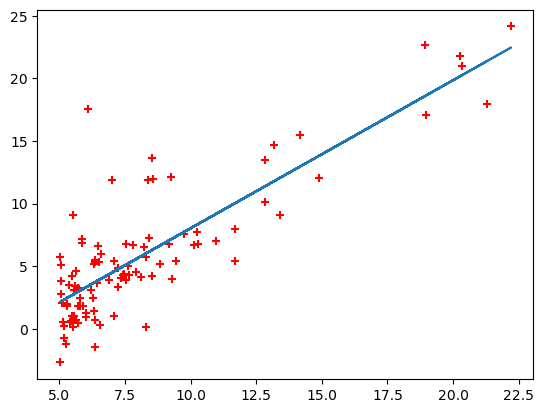

In [24]:
predictions = model(X , theta_finale)
plt.scatter(x,y,c='r',marker='+')
plt.plot(x ,predictions)

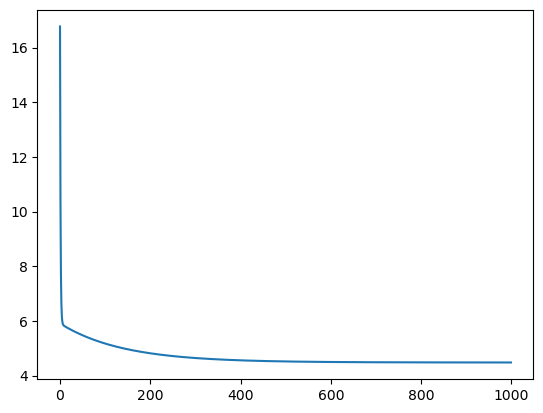

In [21]:
plt.plot(range(1000),cost_history)

In [22]:
def coef_determination(y,pred):
    u=((y - pred)**2).sum()
    v=((y - y.mean())**2).sum()
    return 1 - u/v

In [23]:
coef_determination(y,predictions)

0.7019617122928004